In [62]:
import numpy as np
import pandas as pd
import csv



In [78]:
with open('bank-additional-full.csv', 'r') as file:
    csv_reader = csv.reader(file)
    c = 0
    for row in csv_reader:
        dt = row[0].split(';')
        if c == 0:
          #bank_df.loc['0'] = np.array(dt)
          cc = np.array(dt)
        else:
          continue
        c += 1

In [83]:
cc = [str(i).strip('""') for i in cc]
cc

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [98]:
bank_df = pd.DataFrame()

In [95]:
col_dict = {}
for e in cc:
  col_dict[e] = []

In [96]:
with open('bank-additional-full.csv', 'r') as file:
    csv_reader = csv.reader(file)
    c = 0
    for row in csv_reader:
        dt = row[0].split(';')
        #print(dt)
        if c == 0:
          #bank_df.loc['0'] = np.array(dt)
          #bank_df.columns = np.array(dt)
          c += 1
          continue

        elif c == 1:
          dt = [str(i).strip('""') for i in dt]
          for j in range(21):
            if j in [0, 10, 11, 12, 13, 15, 16, 17, 18, 19]:
              col_dict[cc[j]].append(float(dt[j]))
            else:
              col_dict[cc[j]].append(dt[j])




In [107]:
dt

['74',
 'retired',
 'married',
 'professional.course',
 'no',
 'yes',
 'no',
 'cellular',
 'nov',
 'fri',
 '239',
 '3',
 '999',
 '1',
 'failure',
 '-1.1',
 '94.767',
 '-50.8',
 '1.028',
 '4963.6',
 'no']

In [99]:
for e in cc:
  bank_df[e] = np.array(col_dict[e])

In [101]:
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [120]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

from sklearn.metrics import roc_curve, roc_auc_score


In [121]:
X = bank_df.drop(['y'], axis = 1)
y = np.where(bank_df['y']=='no', 0, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [122]:
sum(y)/len(y)

0.11265417111780131

In [123]:
# Define the categorical columns
categorical_features = [ 'job','marital','education',
 'default','housing','loan','contact','month','day_of_week', 'poutcome']



In [125]:
# Create a K Neighbors Classifier
neigh = KNeighborsClassifier(n_neighbors=3)
# Create the pipeline
n_pipeline = Pipeline([
    ('onehot', ColumnTransformer(
        [('encoder', OneHotEncoder(), categorical_features)],
        remainder='passthrough'  # Pass through non-categorical columns
    )),
    ('classifier', neigh)
])
# Fit the pipeline
n_pipeline.fit(X_train[cc[:-1]], y_train)


# Create a Logistic Regression Classifier
lr_clf = LogisticRegression(random_state=0)
# Create the pipeline
lr_pipeline = Pipeline([
    ('onehot', ColumnTransformer(
        [('encoder', OneHotEncoder(), categorical_features)],
        remainder='passthrough'  # Pass through non-categorical columns
    )),
    ('classifier', lr_clf)
])

# Fit the pipeline
lr_pipeline.fit(X_train[cc[:-1]], y_train)



# Create a Decision Tree Classifier
tree_clf = DecisionTreeClassifier()
# Create the pipeline
tree_pipeline = Pipeline([
    ('onehot', ColumnTransformer(
        [('encoder', OneHotEncoder(), categorical_features)],
        remainder='passthrough'  # Pass through non-categorical columns
    )),
    ('classifier', tree_clf)
])

# Fit the pipeline
tree_pipeline.fit(X_train[cc[:-1]], y_train)


# Create a Support Vector Machine Classifier
svm_clf = svm.SVC()
# Create the pipeline
svm_pipeline = Pipeline([
    ('onehot', ColumnTransformer(
        [('encoder', OneHotEncoder(), categorical_features)],
        remainder='passthrough'  # Pass through non-categorical columns
    )),
    ('classifier', svm_clf)
])

# Fit the pipeline
svm_pipeline.fit(X_train[cc[:-1]], y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppr

Pipeline(steps=[('onehot',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
                ('classifier', SVC())])

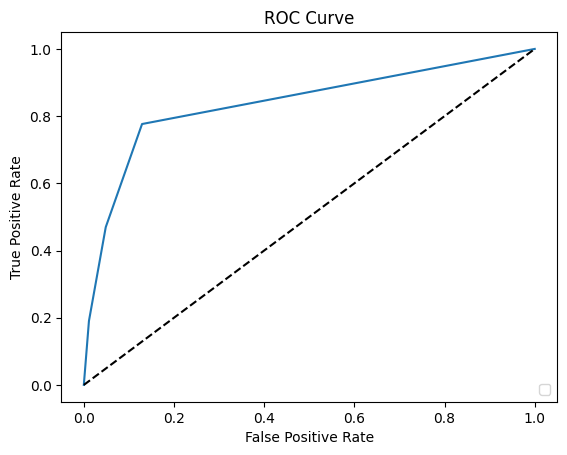

In [128]:
# Predict probabilities for K Neighbors Classifier
y_prob = n_pipeline.predict_proba(X_test)[:, 1]

# Calculate ROC curve for K Neighbors Classifier
fpr, tpr, thresholds = roc_curve(y_test, y_prob)


# Plot ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

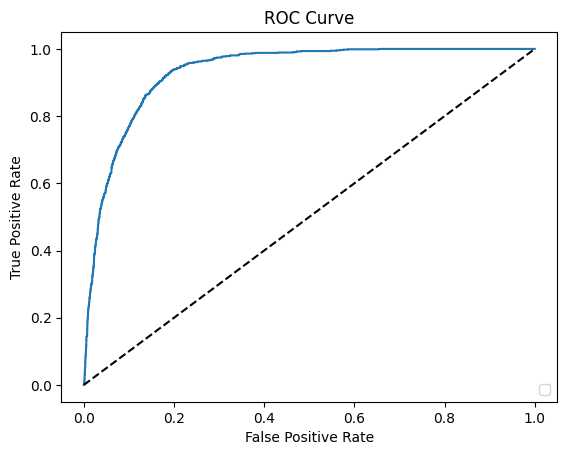

In [130]:
# Predict probabilities for Logistic Regression Classifier
y_prob = lr_pipeline.predict_proba(X_test)[:, 1]

# Calculate ROC curve for Logisitc Regression Classifier
fpr, tpr, thresholds = roc_curve(y_test, y_prob)


# Plot ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

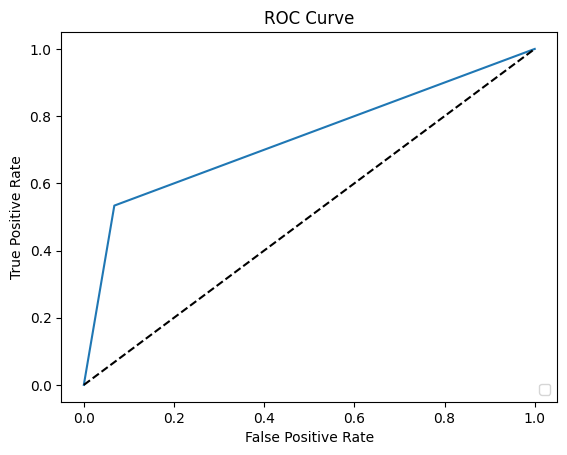

In [131]:
# Predict probabilities for Decision Tree Classifier
y_prob = tree_pipeline.predict_proba(X_test)[:, 1]

# Calculate ROC curve for Decision Tree Classifier
fpr, tpr, thresholds = roc_curve(y_test, y_prob)


# Plot ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

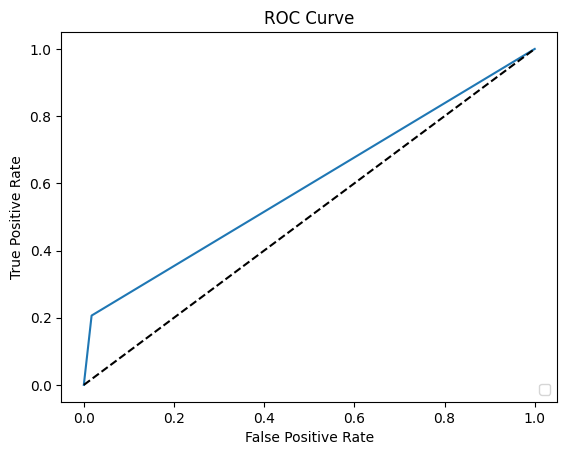

In [134]:
# Predict probabilities for Support Vector Machine Classifier
y_prob = svm_pipeline.predict(X_test)

# Calculate ROC curve for Support Vector Machine Classifier
fpr, tpr, thresholds = roc_curve(y_test, y_prob)


# Plot ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()